k-NN 에서 중요한 매개변수는 2가지.
- neighbors의 수
- 거리를 재는 방법: 보통은 euclidean 을 사용함.

단점
- 수백 개 이상의 특성을 가진 dataset에는 잘 작동하지 않음.
- 특성 값 대부분이 0인 희소한 데이터셋에는 잘 작동하지 않음.

X.shape: (26, 2)


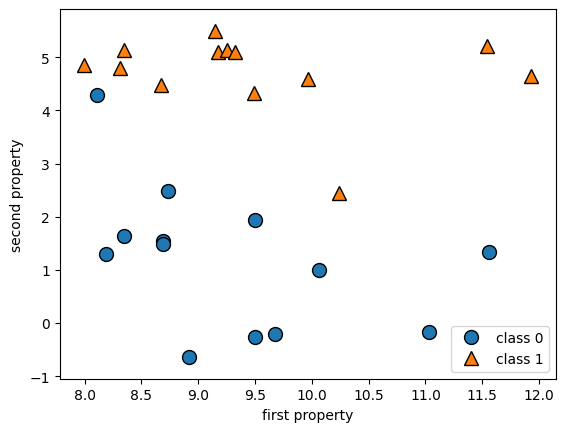

In [1]:
#dataset 만들기
import mglearn
X, y = mglearn.datasets.make_forge()

# 산점도 그리기
%matplotlib inline
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first property")
plt.ylabel("second property")
print("X.shape: {}".format(X.shape))
#이런 폰트가 없어서 에러가 나는군.

In [4]:
#데이터를 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
#kNN 학습 객체를 만들고
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [5]:
#그 학습 개체에 train data를 넣어서 학습
#솔직히 kNN은 학습시킬 것도 없어보이긴 해.

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("테스트 세트 정답: {}".format(y_test))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정답: [1 0 1 0 1 1 0]
테스트 세트 정확도: 0.86


### 결정 경계 (decesion boundary) 보기
- 2차원 데이터셋의 경우에.
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색 칠하기.
- neighbor 값이 커질수록 경계가 더 부드러워진다.
    - 더 단순한 모델임을 의미

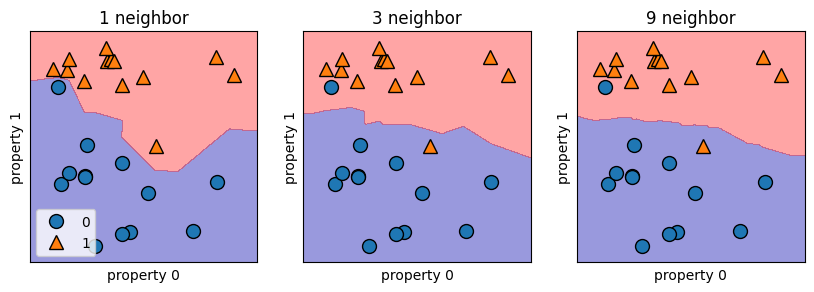

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    #fit 메서드는 self 객체를 반환함.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    #이것은 그냥 점은 찍히지 않고 그냥 영역에 색칠만 시키는 것.
    #ax에다가 그린다는 의미.
    #alpha느 투명도일거다.
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    #이것은 그렇게 색칠된 영역 위에 점들을 뿌려주는 것
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("property 0")
    ax.set_ylabel("property 1")
axes[0].legend(loc=3)

### 유방암 데이터에 적용해 보기.


In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
#stratify의 의미: 계층적 데이터 추출 옵션
#여러 층으로 분할 후, 각 층별로 random data 추출. 원래 데이터 분포와 유사하게.
#이게 없으면 유방암, 정상 섞인 환자 그룹에서 train group에 유방암 환자만 뽑혀버릴 수 있으니까.
#stratify= 에 들어간 변수의 값이 같은 것 끼리를 층으로 묶어서 거기서 train과 test가 잘 나뉘도록 하는 듯.

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1,11)

In [14]:
for n_neighbors in neighbors_setting:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장.
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

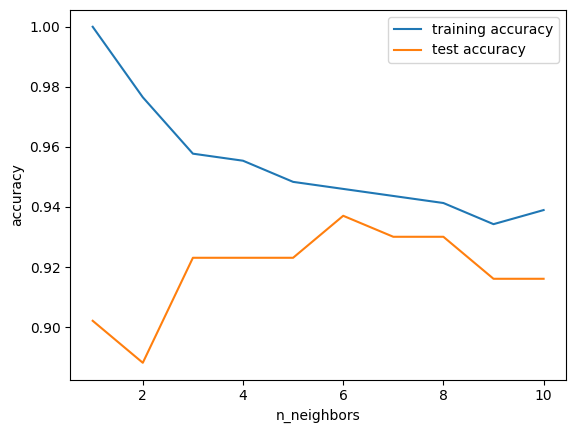

In [15]:
plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

과대적합과 과소적합을 볼 수 있음. 